In [2]:
from Helpers.header import *

ModuleNotFoundError: No module named 'Helpers.header'

In [5]:
def run_PCA(data, labels, n_components=2):
    """
    Runs PCA on the data.
    """
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents)
    principalDf['label'] = labels
    return principalDf

In [30]:
def plot_stuff(train_PCA, labels, graph_label, dataset):
    """
    Plots the PCA results.
    """
    N = len(set(labels))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    x = train_PCA[0]
    y = train_PCA[1]
    tag = labels

    cmap = plt.cm.jet
    cmpalist = [cmap(i) for i in range(cmap.N)]
    cmap = cmap.from_list('Custom cmap', cmpalist, cmap.N)

    bounds = np.linspace(0, N, N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    scat = ax.scatter(x, y, c=tag, cmap=cmap, norm=norm)
    cb = plt.colorbar(scat, spacing='proportional', ticks=bounds)
    cb.set_label('Custom cbar')
    ax.set_title(graph_label)
    plt.savefig(f'Plots/{dataset}_{graph_label}.jpeg')
    plt.show()

In [7]:
def run_sammon(data, labels, n_components=2):
    """
    Runs Sammon on the data.
    """
    new_data = data.to_numpy()
    new_data = np.delete(new_data, -1, axis=1)
    [y_new, E] = sammon(new_data, n_components)
    y_new = pd.DataFrame(y_new)
    y_new['label'] = labels
    return y_new

In [8]:
def run_isomap(data, labels, n_components=2):
    embedding = Isomap(n_components=n_components)
    X_transformed = embedding.fit_transform(data)
    X_transformed = pd.DataFrame(X_transformed)
    X_transformed['label'] = labels
    return X_transformed

# MNIST Dataset

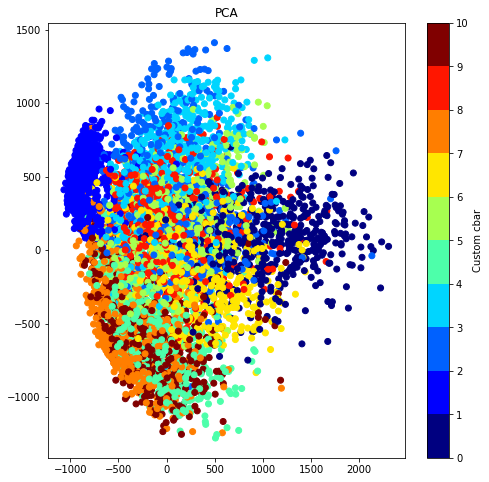

In [37]:
dataset = load_from_csv('Datasets/mnist_test.csv')
train_data = dataset.sample(n=6000, random_state=42)

labels = train_data['label']

train_data = train_data.drop(columns=['label'])
train_PCA = run_PCA(train_data, labels, 2)

#PCA plot for 2 components
plot_stuff(train_PCA, labels, 'PCA', 'MNIST')

In [38]:
train_PCA = run_PCA(train_data, labels, 30)
smapping = run_sammon(train_PCA, labels, 2)
plot_stuff(smapping, labels, 'Sammon', 'MNIST')

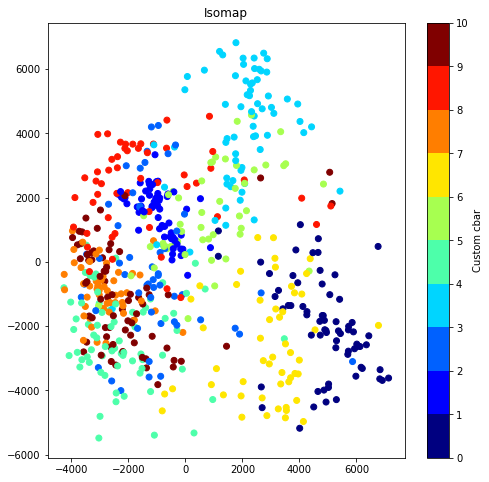

In [33]:
isomap = run_isomap(train_data, labels, 2)
plot_stuff(isomap, labels, 'Isomap', 'MNIST')

# Olivetti Dataset

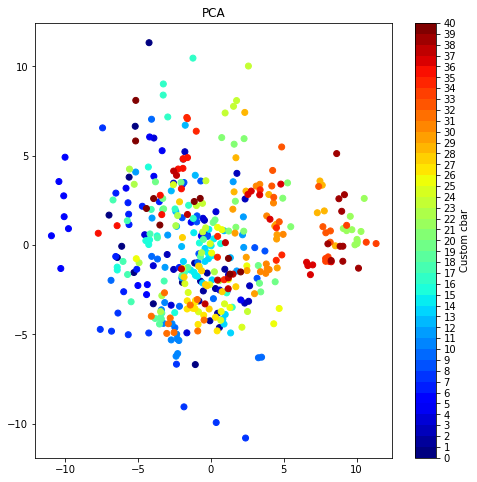

In [34]:
olivetti_dataset = fetch_olivetti_faces()

labels = np.array(olivetti_dataset["target"])

train_PCA = run_PCA(olivetti_dataset['data'], labels, 2)
#PCA plot for 2 components
plot_stuff(train_PCA, labels, 'PCA', 'Olivetti')

TolFun exceeded: Optimisation terminated


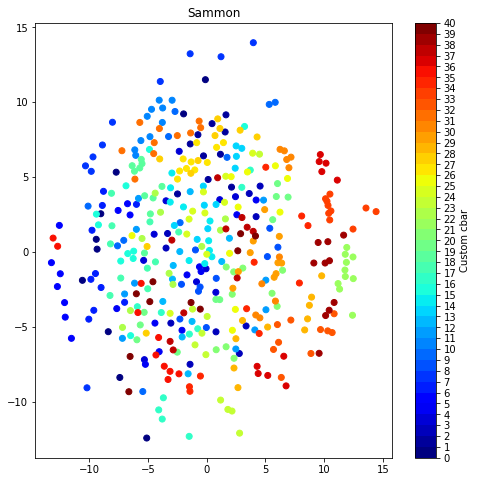

In [35]:
train_PCA = run_PCA(olivetti_dataset['data'], labels, 30)
smapping = run_sammon(train_PCA, labels, 2)
plot_stuff(smapping, labels, 'Sammon', 'Olivetti')

/home/keshav/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/keshav/.local/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 12 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/keshav/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/keshav/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.fla

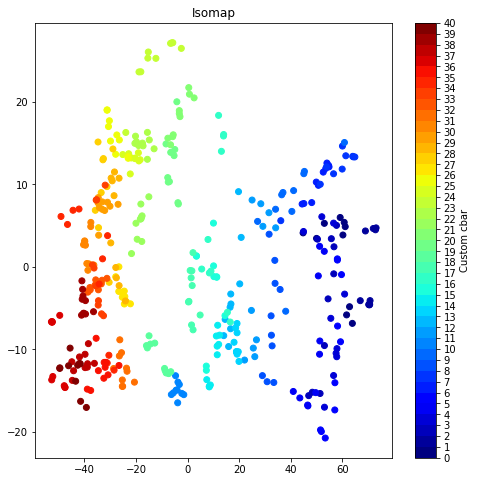

In [36]:
isomap = run_isomap(train_PCA, labels, 2)
plot_stuff(isomap, labels, 'Isomap', 'Olivetti')